In [9]:
# Copyright (c) 2019, Grégoire Payen de La Garanderie, Durham University
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

from tqdm import tqdm
import numpy as np
import cv2
import io
import sys
from avcv.vision import images_to_video
from simple_waymo_open_dataset_reader import WaymoDataFileReader
from simple_waymo_open_dataset_reader import dataset_pb2
from simple_waymo_open_dataset_reader import utils

def display_labels_on_image(camera_calibration, camera, labels, display_time = -1):
    # Get the image transformation matrix
    vehicle_to_image = utils.get_image_transform(camera_calibration)

    # Decode the JPEG image
    img = utils.decode_image(camera)

    # Draw all the groundtruth labels
    for label in labels:
        utils.draw_3d_box(img, vehicle_to_image, label)
    return img



In [10]:
# from avcv.vision import *

  0%|          | 0/198 [00:00<?, ?it/s]

There are 198 frames in this file.


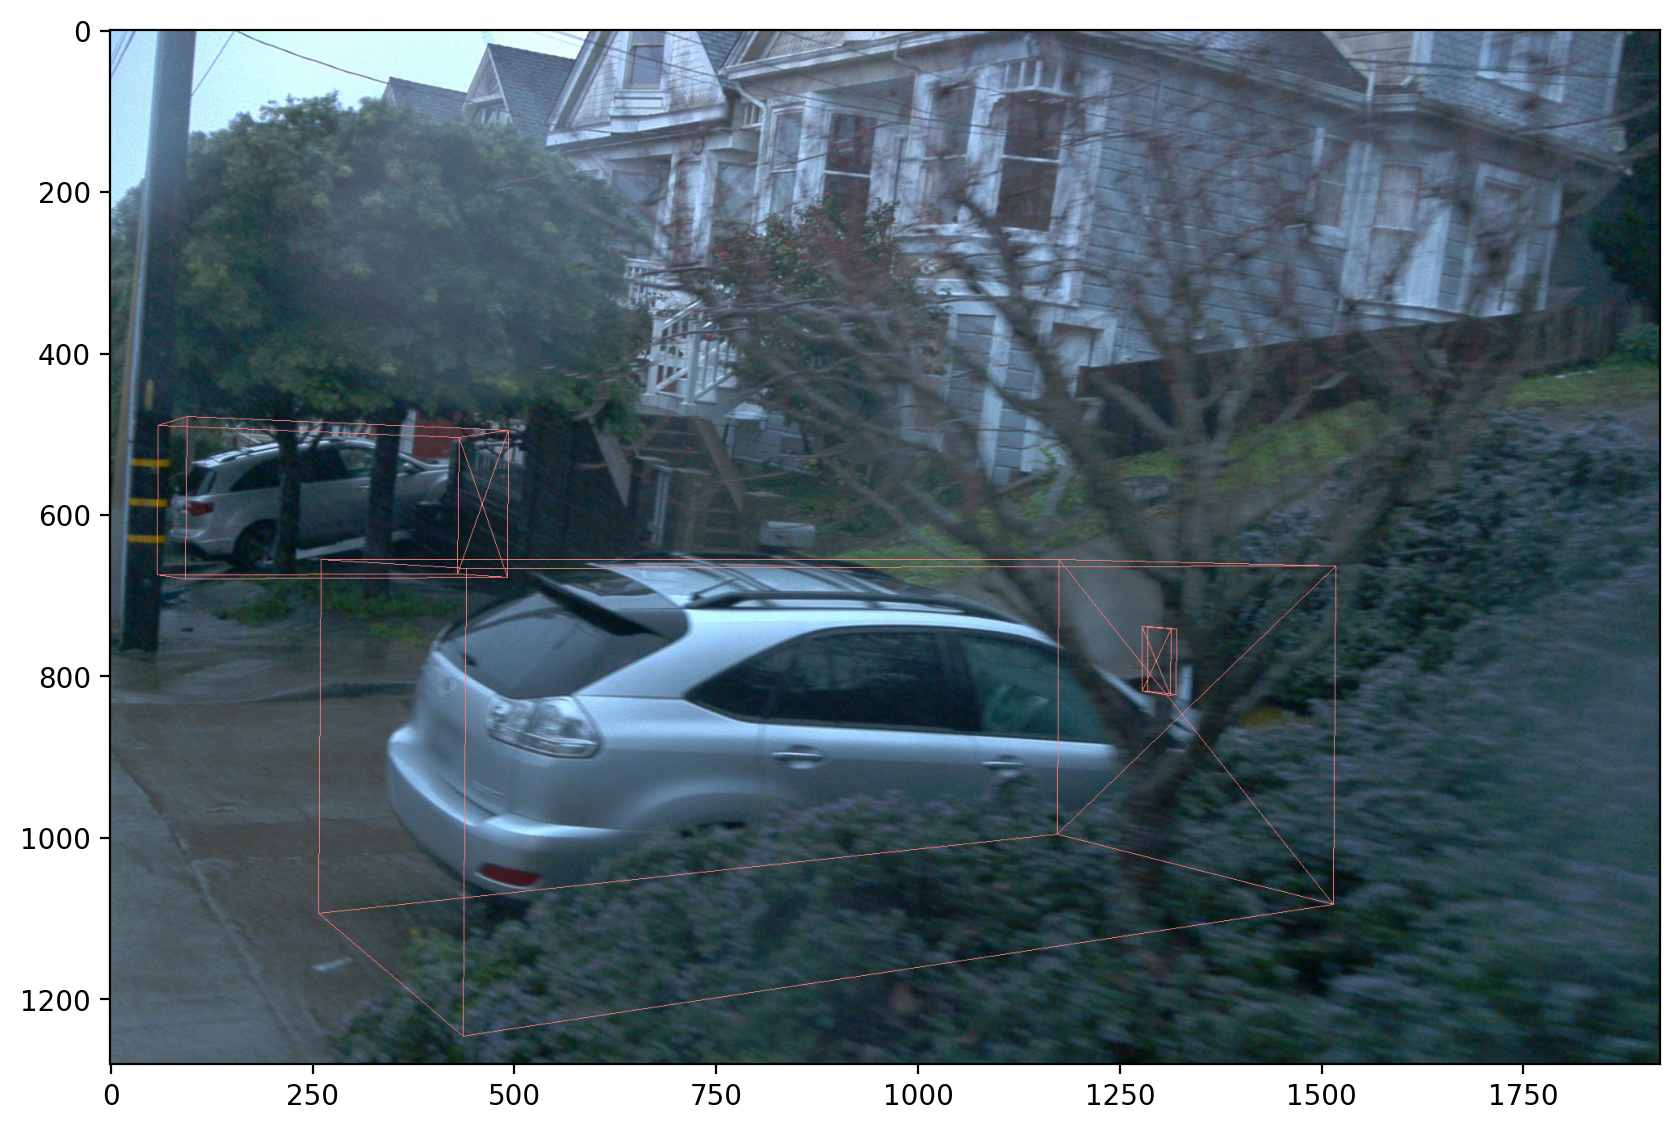

 12%|█▏        | 24/198 [00:01<00:13, 12.58it/s]


In [14]:

from glob import glob
import os.path as osp
filename = '/data/waymo/tfs/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord'
datafile = WaymoDataFileReader(filename)

# Generate a table of the offset of all frame records in the file.
table = datafile.get_record_table()

print("There are %d frames in this file." % len(table))
ti = 24
pbar = tqdm(datafile, total=len(table))
images = []
i = 0
for frame in pbar:

    if ti == i:
        camera_name = dataset_pb2.CameraName.FRONT_RIGHT
        camera_calibration = utils.get(frame.context.camera_calibrations, camera_name)
        camera = utils.get(frame.images, camera_name)
        image = display_labels_on_image(camera_calibration, camera, frame.laser_labels, 10)
        show(image, dpi=200)
        break
    i += 1